<a href="https://colab.research.google.com/github/Sanjivani18/Machine-Learning/blob/master/SalineWater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Make a linear regression line between the temperature and the salinity of the ocean.
Predict five values and mention the accuracy of your model(With the predicted values and actual values shown). Mention your training/test set ratio. 


# Importing Libraries and Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
path = "/content/bottle.csv"
df = pd.read_csv(path)

# Data Preprocessing /Cleaning

In [ ]:
df = df[:][:500]
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X=df.iloc[:,6].values.reshape(-1,1)
y=df.iloc[:,5].values.reshape(-1,1)

In [ ]:
print(np.any(np.isnan(X)))
print(np.any(np.isnan(y)))

True
True


In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.NaN,strategy='mean')
imputer=imputer.fit(X)
X=imputer.transform(X)
imputer=imputer.fit(y)
y=imputer.transform(y)

In [ ]:
print(np.any(np.isnan(X)))
print(np.any(np.isnan(y)))

False
False


# Training & Testing

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

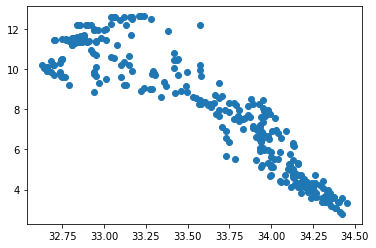

In [94]:
plt.scatter(X_train,y_train)

# Regression

In [95]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
y_pred=regressor.predict(X_test)

# Visualisation 

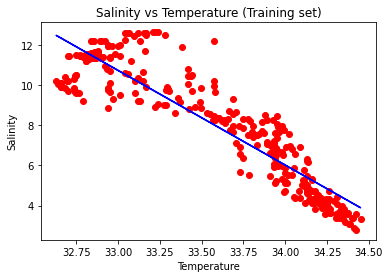

In [97]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salinity vs Temperature (Training set)')
plt.xlabel('Temperature')
plt.ylabel('Salinity')
plt.show()

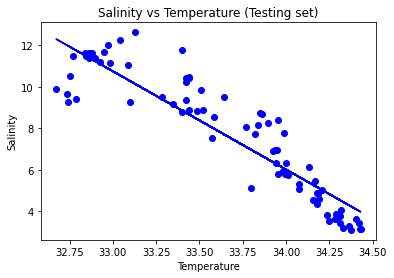

In [98]:
plt.scatter(X_test, y_test, color = 'Blue')
plt.plot(X_test, regressor.predict(X_test), color = 'Blue')
plt.title('Salinity vs Temperature (Testing set)')
plt.xlabel('Temperature')
plt.ylabel('Salinity')
plt.show()

# Accuracy and Predictions

In [99]:
acc=regressor.score(X_test,y_test)
acc


0.837259358365476

In [100]:
print(regressor.intercept_)

[166.98070981]


In [101]:
print(regressor.coef_)

[[-4.73417184]]


In [102]:
print(regressor.predict([[15]]))

[[95.96813219]]


In [103]:
print(regressor.predict([[12]]))

[[110.17064771]]


In [104]:
print(regressor.predict([[20]]))

[[72.29727298]]


In [105]:
print(regressor.predict([[100]]))

[[-306.43647432]]


In [106]:
print(regressor.predict([[0]]))

[[166.98070981]]


In [107]:
y_pred

array([[11.98392372],
       [ 4.66962823],
       [ 4.09679343],
       [ 8.85937031],
       [ 4.83532424],
       [ 3.98317331],
       [11.32113966],
       [ 7.98354852],
       [ 6.25557579],
       [ 4.24828693],
       [ 8.44276318],
       [ 8.76468687],
       [ 6.23190494],
       [11.4158231 ],
       [ 7.72316907],
       [ 3.98790748],
       [ 9.40853424],
       [ 6.31238586],
       [ 6.96570157],
       [ 8.30073803],
       [ 4.55127393],
       [ 6.11355064],
       [11.936582  ],
       [11.22645623],
       [ 4.66489406],
       [11.49630402],
       [ 6.36919592],
       [ 6.68165126],
       [11.47736734],
       [10.27962186],
       [ 6.03780389],
       [ 5.23299468],
       [ 5.39869069],
       [10.56367217],
       [12.30111324],
       [ 6.87101813],
       [ 4.02578086],
       [ 5.28980474],
       [ 4.30036282],
       [ 5.13357707],
       [11.74721513],
       [10.83351996],
       [ 8.67000343],
       [ 8.67000343],
       [ 6.25084162],
       [ 4

In [108]:
y

array([[10.5       ],
       [10.46      ],
       [10.46      ],
       [10.45      ],
       [10.45      ],
       [10.45      ],
       [10.45      ],
       [10.24      ],
       [10.06      ],
       [ 9.86      ],
       [ 9.83      ],
       [ 9.67      ],
       [ 9.5       ],
       [ 9.32      ],
       [ 8.76      ],
       [ 8.71      ],
       [ 8.53      ],
       [ 8.45      ],
       [ 8.26      ],
       [ 7.96      ],
       [ 7.77      ],
       [ 6.8       ],
       [ 6.55      ],
       [ 5.78      ],
       [ 5.3       ],
       [ 5.29      ],
       [ 5.01      ],
       [ 4.72      ],
       [ 4.44      ],
       [10.1       ],
       [ 9.89      ],
       [ 9.75      ],
       [ 9.69      ],
       [ 9.52      ],
       [ 9.06      ],
       [ 9.04      ],
       [ 8.92      ],
       [ 8.83      ],
       [ 8.37      ],
       [ 8.26      ],
       [ 7.85      ],
       [ 7.64      ],
       [ 7.5       ],
       [ 6.98      ],
       [ 6.85      ],
       [ 6